In [67]:
import pandas as pd

In [69]:
df = pd.read_csv('heart.csv')

In [71]:
df=df.dropna()

In [73]:
import matplotlib.pyplot as plt


In [75]:
import seaborn as sns

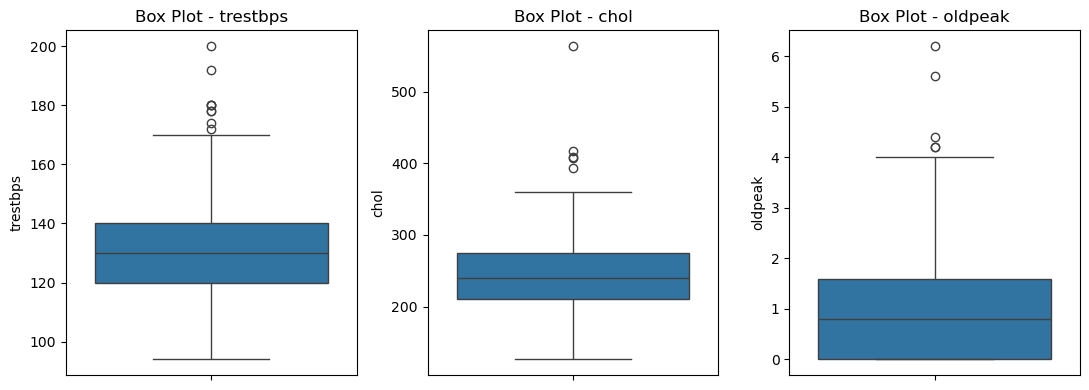

In [77]:
plt.figure(figsize=(11, 4))

for i, col in enumerate(['trestbps', 'chol', 'oldpeak'], 1):
    plt.subplot(1, 3, i)
    sns.boxplot(y=df[col])
    plt.title(f'Box Plot - {col}')

plt.tight_layout()
plt.show()

In [91]:
columns = ['trestbps', 'chol', 'oldpeak']


for col in columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Filter out the outliers
    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

print(df)

     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     63    1   3       145   233    1        0      150      0      2.3   
1     37    1   2       130   250    0        1      187      0      3.5   
2     41    0   1       130   204    0        0      172      0      1.4   
3     56    1   1       120   236    0        1      178      0      0.8   
4     57    0   0       120   354    0        1      163      1      0.6   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
298   57    0   0       140   241    0        1      123      1      0.2   
299   45    1   3       110   264    0        1      132      0      1.2   
300   68    1   0       144   193    1        1      141      0      3.4   
301   57    1   0       130   131    0        1      115      1      1.2   
302   57    0   1       130   236    0        0      174      0      0.0   

     slope  ca  thal  target  
0        0   0     1       1  
1        0   0     2     

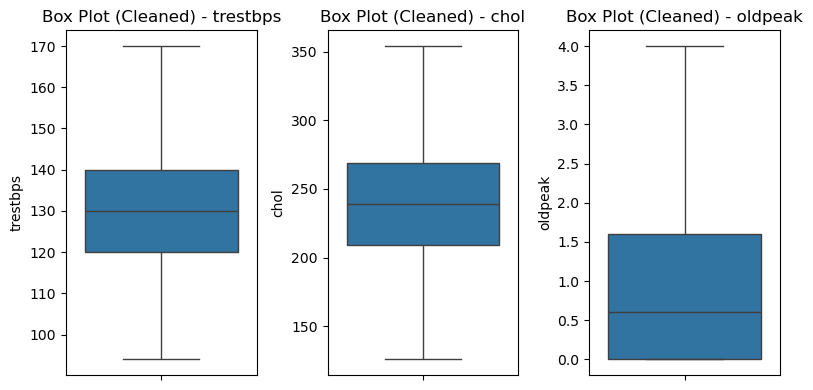

In [93]:
plt.figure(figsize=(8, 4))
for i, col in enumerate(columns, 1):
    plt.subplot(1, 3, i)
    sns.boxplot(y=df[col])
    plt.title(f'Box Plot (Cleaned) - {col}')

plt.tight_layout()
plt.show()

In [89]:
columns = ['trestbps', 'chol', 'oldpeak','age',  'thalach',  'ca']


for col in columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Filter out the outliers
    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

print(df)

     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     63    1   3       145   233    1        0      150      0      2.3   
1     37    1   2       130   250    0        1      187      0      3.5   
2     41    0   1       130   204    0        0      172      0      1.4   
3     56    1   1       120   236    0        1      178      0      0.8   
4     57    0   0       120   354    0        1      163      1      0.6   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
298   57    0   0       140   241    0        1      123      1      0.2   
299   45    1   3       110   264    0        1      132      0      1.2   
300   68    1   0       144   193    1        1      141      0      3.4   
301   57    1   0       130   131    0        1      115      1      1.2   
302   57    0   1       130   236    0        0      174      0      0.0   

     slope  ca  thal  target  
0        0   0     1       1  
1        0   0     2     

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
le = LabelEncoder()

In [21]:
text_columns = df.select_dtypes(include=['object']).columns

In [23]:
for col in text_columns:
    df[col] = le.fit_transform(df[col])

In [27]:
print(df.head())

   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  target  
0   0     1       1  
1   0     2       1  
2   0     2       1  
3   0     2       1  
4   0     2       1  


In [95]:
from sklearn.preprocessing import StandardScaler

In [97]:


# Step 1: Separate features from target
features = df.drop('target', axis=1).columns
target = 'target'

# Step 2: Scale the features
scaler = StandardScaler()
df[features] = scaler.fit_transform(df[features])

# Step 3: Define X and y after scaling
X = df[features]
y = df[target]

# Optional: check output
print(X.head())
print(y.head())


        age      sex        cp  trestbps      chol       fbs   restecg  \
0  1.033027  0.67873  1.926999  1.049960 -0.193678  2.622744 -1.040127   
1 -1.852618  0.67873  0.961643  0.057511  0.195793 -0.381280  0.905434   
2 -1.408673 -1.47334 -0.003713  0.057511 -0.858069 -0.381280 -1.040127   
3  0.256122  0.67873 -0.003713 -0.604122 -0.124948 -0.381280  0.905434   
4  0.367109 -1.47334 -0.969069 -0.604122  2.578438 -0.381280  0.905434   

    thalach    exang   oldpeak     slope        ca      thal  
0 -0.061336 -0.67873  1.296428 -2.362321 -0.699086 -2.125880  
1  1.619727 -0.67873  2.450124 -2.362321 -0.699086 -0.471003  
2  0.938215 -0.67873  0.431157  0.930995 -0.699086 -0.471003  
3  1.210819 -0.67873 -0.145691  0.930995 -0.699086 -0.471003  
4  0.529308  1.47334 -0.337974  0.930995 -0.699086 -0.471003  
0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64


In [47]:
from sklearn.model_selection import train_test_split

In [49]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y  # stratify to maintain class balance
)

# Check shapes
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (210, 13)
X_test shape: (53, 13)
y_train shape: (210,)
y_test shape: (53,)


In [55]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score

# Train standalone SVM
svm_model = SVC(random_state=42)
svm_model.fit(X_train, y_train)

# Predict on test set
y_pred_svm = svm_model.predict(X_test)

# Evaluate
print("Standalone SVM Accuracy:", accuracy_score(y_test, y_pred_svm))
print("Classification Report:\n", classification_report(y_test, y_pred_svm))


Standalone SVM Accuracy: 0.8301886792452831
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.68      0.77        22
           1       0.81      0.94      0.87        31

    accuracy                           0.83        53
   macro avg       0.84      0.81      0.82        53
weighted avg       0.84      0.83      0.83        53



In [59]:
from sklearn.ensemble import BaggingClassifier

# Create Bagging model using SVM as base estimator
bagging_svm = BaggingClassifier(estimator=SVC(),
                                n_estimators=10,
                                random_state=42)

# Train Bagging model
bagging_svm.fit(X_train, y_train)

# Predict on test set
y_pred_bagging = bagging_svm.predict(X_test)

# Evaluate
print("Bagging SVM Accuracy:", accuracy_score(y_test, y_pred_bagging))
print("Classification Report:\n", classification_report(y_test, y_pred_bagging))


Bagging SVM Accuracy: 0.8679245283018868
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.77      0.83        22
           1       0.85      0.94      0.89        31

    accuracy                           0.87        53
   macro avg       0.87      0.85      0.86        53
weighted avg       0.87      0.87      0.87        53

